In [1]:
library("vars")
library("tidyr")
library("xts")
library("stargazer")

Loading required package: MASS
Loading required package: strucchange
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: sandwich
Loading required package: urca
Loading required package: lmtest
Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Please cite as: 

 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 



In [76]:
data <- read.csv("//home/ostapkharysh/Documents/bt_data/DescriptiveFebruary29June05_2016/ET/AMZN/PR.csv")
data <- drop_na(data)

In [77]:
data

,date,tone,positive,negative,polarity,activ_den,self_den,fin_return,weight
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
54,2016-02-29 13:45:00,0.9022556,2.406015,1.50375940,3.909774,20.45113,0.00000000,3.236863e-04,2.228867e-06
55,2016-02-29 14:00:00,0.3456533,3.788557,3.44290364,7.231461,22.24363,0.86363555,3.044711e-03,1.067255e-04
56,2016-02-29 14:15:00,1.1032072,2.711936,1.60872880,4.320665,21.05964,0.06702841,3.560728e-03,1.330447e-05
57,2016-02-29 14:30:00,4.7190417,5.312533,0.59349119,5.906024,25.99383,1.32800871,8.355592e-04,4.031775e-04
58,2016-02-29 14:45:00,-2.5359256,1.606086,4.14201183,5.748098,20.96365,1.18343195,-3.321365e-03,3.659334e-06
60,2016-02-29 15:15:00,-1.7043454,1.435621,3.13996680,4.575588,20.80098,0.23696648,-1.900743e-03,1.274351e-05
61,2016-02-29 15:30:00,-1.8556842,1.517347,3.37303111,4.890378,21.66980,0.27667246,-6.469331e-04,3.556666e-04
62,2016-02-29 15:45:00,0.7792567,2.959870,2.18061330,5.140483,22.19366,0.46813383,3.641381e-03,9.824652e-06
63,2016-02-29 16:00:00,0.2886140,2.918574,2.62996036,5.548535,21.93399,1.30747378,-2.179307e-04,3.424705e-05


In [78]:
f_return <- ts(data$fin_return)
tone <- ts(data$tone)
polarity <- ts(data$polarity)

In [79]:
VAR_data <- window(ts.union(tone, polarity, f_return))
VAR_est <- VAR(y = VAR_data, p = 8)
#summary(VAR_est)

In [80]:
stargazer(summary(VAR_est))


% Error: Unrecognized object type.


# APARCH

In [42]:
library("vars")
library("tidyr")
library("xts", quietly=TRUE, warn.conflicts=FALSE);
library("quantreg")
library("rugarch")

In [43]:
# ap <- available.packages()
idx <- 1

In [44]:
all = read.csv("//home/ostapkharysh/Documents/bt_data/DescriptiveFebruary29June05_2016/ET/AMZN/PR.csv", header=TRUE);
date = as.POSIXct(all[,idx]);
all.xts = xts(all[-idx], order.by = date);

In [45]:
all.xts = all[,c("tone", "polarity", "positive", "negative", "fin_return", "date")]
all.raw.clean = na.omit(all.xts);

In [46]:
all.raw.clean

,tone,polarity,positive,negative,fin_return,date
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
54,0.9022556,3.909774,2.406015,1.50375940,3.236863e-04,2016-02-29 13:45:00
55,0.3456533,7.231461,3.788557,3.44290364,3.044711e-03,2016-02-29 14:00:00
56,1.1032072,4.320665,2.711936,1.60872880,3.560728e-03,2016-02-29 14:15:00
57,4.7190417,5.906024,5.312533,0.59349119,8.355592e-04,2016-02-29 14:30:00
58,-2.5359256,5.748098,1.606086,4.14201183,-3.321365e-03,2016-02-29 14:45:00
60,-1.7043454,4.575588,1.435621,3.13996680,-1.900743e-03,2016-02-29 15:15:00
61,-1.8556842,4.890378,1.517347,3.37303111,-6.469331e-04,2016-02-29 15:30:00
62,0.7792567,5.140483,2.959870,2.18061330,3.641381e-03,2016-02-29 15:45:00
63,0.2886140,5.548535,2.918574,2.62996036,-2.179307e-04,2016-02-29 16:00:00


In [47]:
all.raw = data.frame(coredata(all.raw.clean), ret.abs = abs(all.raw.clean[,5]));
names(all.raw)[6] <- "abs_return"

In [48]:
head(all.raw, 5)

,tone,polarity,positive,negative,fin_return,abs_return,ret.abs
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
54,0.9022556,3.909774,2.406015,1.5037594,0.0003236863,2016-02-29 13:45:00,0.0003236863
55,0.3456533,7.231461,3.788557,3.4429036,0.0030447107,2016-02-29 14:00:00,0.0030447107
56,1.1032072,4.320665,2.711936,1.6087288,0.0035607284,2016-02-29 14:15:00,0.0035607284
57,4.7190417,5.906024,5.312533,0.5934912,0.0008355592,2016-02-29 14:30:00,0.0008355592
58,-2.5359256,5.748098,1.606086,4.1420118,-0.0033213654,2016-02-29 14:45:00,0.0033213654


### IMPORTANT OUTLIERS FILTERING

In [49]:
all.raw$fin_return[all.raw$fin_return> 0.08]=0.01
#plot(all.raw$fin_return)

In [50]:
exp = data.frame()

In [51]:
r.garch.spec = ugarchspec(variance.model=list(model="fGARCH", submodel="APARCH",  garchOrder=c(1,1), external.regressors = cbind(all.raw$tone)) , 
                             mean.model = list(armaOrder=c(1,0), include.mean=TRUE ), distribution.model = "norm" )  

#r.garch = ugarchfit(r.garch.spec, all.raw$fin_return,  solver="solnp",  solver.control=list( maxeval=20, rseed=9876 ))
aptone = ugarchfit(r.garch.spec, all.raw$fin_return)

r.garch.spec = ugarchspec(variance.model=list(model="fGARCH", submodel="APARCH",  garchOrder=c(1,1)) , 
                             mean.model = list(armaOrder=c(1,0), include.mean=TRUE ), distribution.model = "norm" )  

#r.garch = ugarchfit(r.garch.spec, all.raw$fin_return,  solver="solnp",  solver.control=list( maxeval=20, rseed=9876 ))
ap = ugarchfit(r.garch.spec, all.raw$fin_return)


r.garch.spec = ugarchspec(variance.model=list(model="sGARCH", garchOrder=c(1,1)) , 
                             mean.model = list(armaOrder=c(1,0), include.mean=TRUE ), distribution.model = "norm" )  

#r.garch = ugarchfit(r.garch.spec, all.raw$fin_return,  solver="solnp",  solver.control=list( maxeval=20, rseed=9876 ))
ga = ugarchfit(r.garch.spec, all.raw$fin_return)

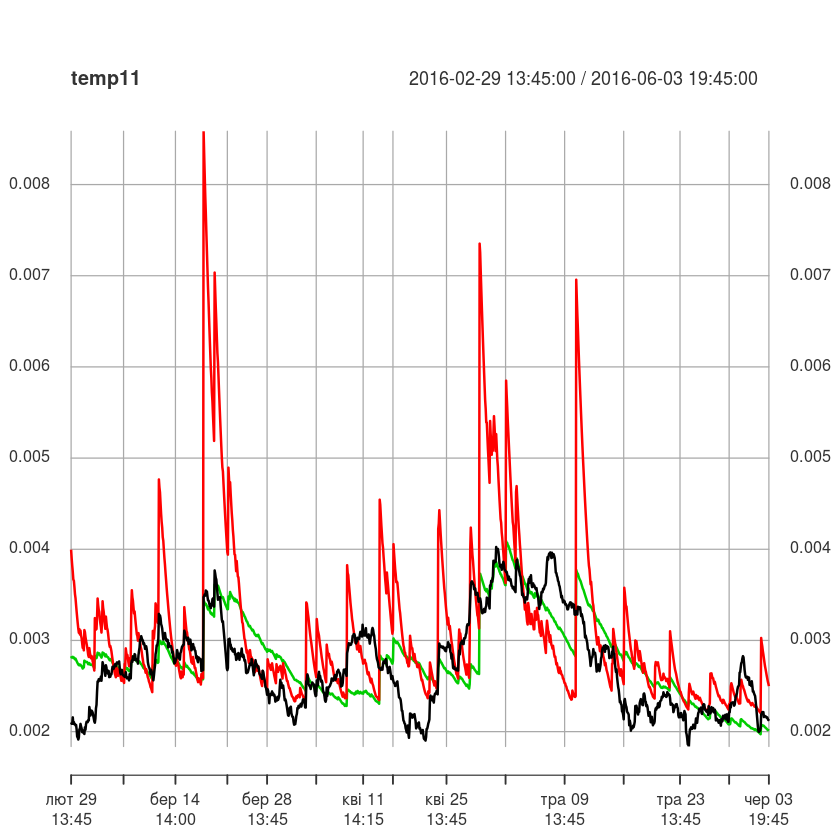

In [52]:
#Sys.setlocale(category = "LC_ALL", locale = "english")

exp.data = data.frame(all.raw.clean$date, c(sigma(aptone)), c(sigma(ap)), c(sigma(ga)))
temp10 = zoo(exp.data[,2], exp.data[,1])
temp11 = xts(exp.data[,-1], order.by = as.POSIXct(exp.data[,1]), locale = "english")


#pdf("hgh.pdf", width=10, height=6)
plot.xts(temp11, observation.based=TRUE)


In [53]:
names(exp.data) <-c("date", "aptone", "ap", "ga")

In [54]:
exp.data$date <- as.POSIXct(exp.data$date,tz=Sys.timezone())
exp.data$tone <- all.raw$tone
exp.data$fin_return <- all.raw$fin_return

In [57]:
write.csv(exp.data, "results.csv")

In [181]:
exp.data

,date,aptone,ap,ga
,<dttm>,<dbl>,<dbl>,<dbl>
1970-01-02 01:00:00,2016-02-29 13:45:00,0.002101314,0.003995562,0.002827219
1970-01-03 01:00:00,2016-02-29 14:00:00,0.002086370,0.003899455,0.002812891
1970-01-04 01:00:00,2016-02-29 14:15:00,0.002086549,0.003821481,0.002813811
1970-01-05 01:00:00,2016-02-29 14:30:00,0.002156445,0.003754256,0.002820272
1970-01-06 01:00:00,2016-02-29 14:45:00,0.002085325,0.003667615,0.002806798
1970-01-07 01:00:00,2016-02-29 15:15:00,0.002104835,0.003655799,0.002813307
1970-01-08 01:00:00,2016-02-29 15:30:00,0.002081148,0.003587299,0.002805928
1970-01-09 01:00:00,2016-02-29 15:45:00,0.002083335,0.003508380,0.002792655
1970-01-10 01:00:00,2016-02-29 16:00:00,0.002067835,0.003462335,0.002800764


In [128]:
library("ggplot2")

In [129]:
exp.data$date

   [1] "2016-02-29 13:45:00 CET"  "2016-02-29 14:00:00 CET" 
   [3] "2016-02-29 14:15:00 CET"  "2016-02-29 14:30:00 CET" 
   [5] "2016-02-29 14:45:00 CET"  "2016-02-29 15:15:00 CET" 
   [7] "2016-02-29 15:30:00 CET"  "2016-02-29 15:45:00 CET" 
   [9] "2016-02-29 16:00:00 CET"  "2016-02-29 16:15:00 CET" 
  [11] "2016-02-29 16:30:00 CET"  "2016-02-29 17:30:00 CET" 
  [13] "2016-02-29 17:45:00 CET"  "2016-02-29 18:00:00 CET" 
  [15] "2016-02-29 18:15:00 CET"  "2016-02-29 18:30:00 CET" 
  [17] "2016-02-29 18:45:00 CET"  "2016-02-29 19:00:00 CET" 
  [19] "2016-02-29 19:15:00 CET"  "2016-02-29 19:30:00 CET" 
  [21] "2016-02-29 19:45:00 CET"  "2016-03-01 14:00:00 CET" 
  [23] "2016-03-01 14:15:00 CET"  "2016-03-01 14:30:00 CET" 
  [25] "2016-03-01 15:00:00 CET"  "2016-03-01 15:15:00 CET" 
  [27] "2016-03-01 15:30:00 CET"  "2016-03-01 15:45:00 CET" 
  [29] "2016-03-01 16:00:00 CET"  "2016-03-01 16:15:00 CET" 
  [31] "2016-03-01 16:30:00 CET"  "2016-03-01 16:45:00 CET" 
  [33] "2016-03-01 17:00

In [130]:
tail(exp.data$date,26)

 [1] "2016-06-02 16:15:00 CEST" "2016-06-02 16:30:00 CEST"
 [3] "2016-06-02 17:15:00 CEST" "2016-06-02 18:00:00 CEST"
 [5] "2016-06-02 18:15:00 CEST" "2016-06-02 18:30:00 CEST"
 [7] "2016-06-02 19:00:00 CEST" "2016-06-02 19:15:00 CEST"
 [9] "2016-06-02 19:30:00 CEST" "2016-06-02 19:45:00 CEST"
[11] "2016-06-03 14:15:00 CEST" "2016-06-03 15:00:00 CEST"
[13] "2016-06-03 15:15:00 CEST" "2016-06-03 15:30:00 CEST"
[15] "2016-06-03 15:45:00 CEST" "2016-06-03 16:15:00 CEST"
[17] "2016-06-03 16:45:00 CEST" "2016-06-03 17:00:00 CEST"
[19] "2016-06-03 17:30:00 CEST" "2016-06-03 17:45:00 CEST"
[21] "2016-06-03 18:00:00 CEST" "2016-06-03 18:15:00 CEST"
[23] "2016-06-03 18:30:00 CEST" "2016-06-03 18:45:00 CEST"
[25] "2016-06-03 19:30:00 CEST" "2016-06-03 19:45:00 CEST"

In [163]:
exp.data$date[1211:1233]

 [1] "2016-05-23 16:30:00 CEST" "2016-05-23 16:45:00 CEST"
 [3] "2016-05-23 17:45:00 CEST" "2016-05-23 18:15:00 CEST"
 [5] "2016-05-23 18:30:00 CEST" "2016-05-23 18:45:00 CEST"
 [7] "2016-05-23 19:30:00 CEST" "2016-05-23 19:45:00 CEST"
 [9] "2016-05-24 13:45:00 CEST" "2016-05-24 14:00:00 CEST"
[11] "2016-05-24 14:30:00 CEST" "2016-05-24 14:45:00 CEST"
[13] "2016-05-24 15:00:00 CEST" "2016-05-24 15:30:00 CEST"
[15] "2016-05-24 15:45:00 CEST" "2016-05-24 16:00:00 CEST"
[17] "2016-05-24 16:15:00 CEST" "2016-05-24 16:30:00 CEST"
[19] "2016-05-24 16:45:00 CEST" "2016-05-24 17:00:00 CEST"
[21] "2016-05-24 17:15:00 CEST" "2016-05-24 17:30:00 CEST"
[23] "2016-05-24 17:45:00 CEST"

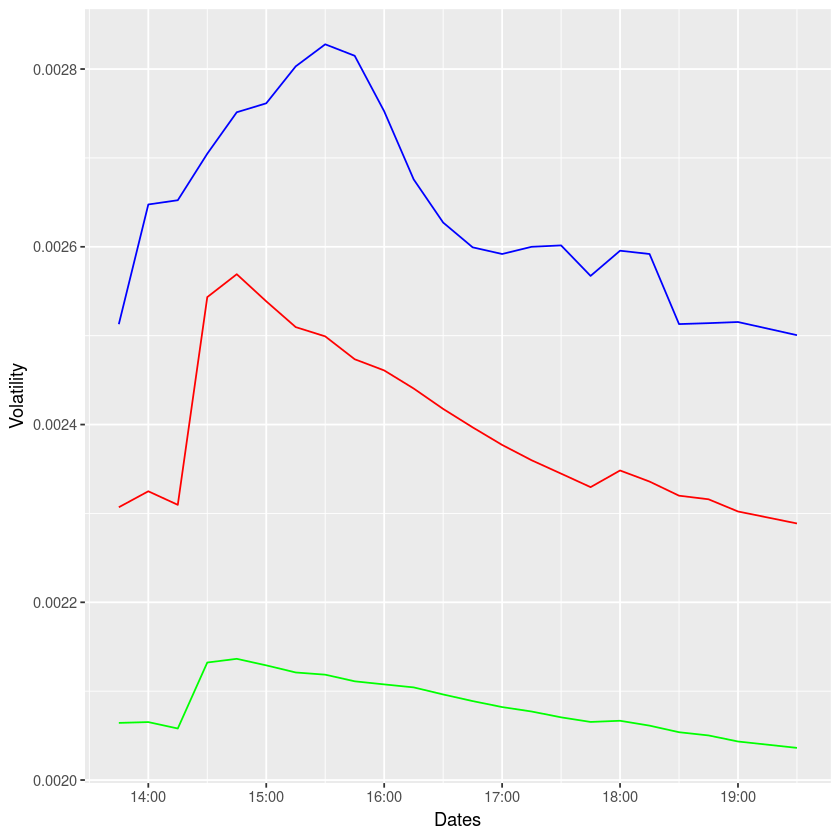

In [180]:
p = ggplot() + 
  geom_line(aes(x = exp.data$date[1211:1233], y = exp.data$aptone[1211:1233]), color = "blue") +
  geom_line(aes(x = exp.data$date[1211:1233], y = exp.data$ap[1211:1233]), color = "red") +
  geom_line(aes(x = exp.data$date[1211:1233], y = exp.data$ga[1211:1233]), color = "green")
  geom_line(aes(x = exp.data$date[1211:1233], y = exp.data$ga[1211:1233]), color = "yellow")+
  xlab('Dates') +
  ylab('Volatility')

print(p)

In [198]:
r.garch.spec = ugarchspec(variance.model=list(model="fGARCH", submodel="APARCH",  garchOrder=c(1,1), external.regressors = cbind(all.raw$tone)) , 
                             mean.model = list(armaOrder=c(1,0), include.mean=TRUE ), distribution.model = "norm" )  

#r.garch = ugarchfit(r.garch.spec, all.raw$fin_return,  solver="solnp",  solver.control=list( maxeval=20, rseed=9876 ))
r.garch = ugarchfit(r.garch.spec, all.raw$fin_return)
r.garch


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: fGARCH(1,1)
fGARCH Sub-Model	: APARCH
Mean Model	: ARFIMA(1,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error    t value Pr(>|t|)
mu      0.000045    0.000075 5.9410e-01  0.55245
ar1     0.024688    0.028628 8.6239e-01  0.38848
omega   0.000000    0.000000 3.1200e-04  0.99975
alpha1  0.010168    0.000327 3.1050e+01  0.00000
beta1   0.986583    0.000386 2.5585e+03  0.00000
eta11   0.968903    0.009189 1.0544e+02  0.00000
lambda  1.304024    0.019944 6.5384e+01  0.00000
vxreg1  0.000004    0.000000 1.4303e+01  0.00000

Robust Standard Errors:
        Estimate  Std. Error    t value Pr(>|t|)
mu      0.000045    0.000079 5.6341e-01  0.57315
ar1     0.024688    0.037175 6.6410e-01  0.50663
omega   0.000000    0.000000 1.8200e-04  0.99986
alp

In [104]:
r.garch.spec = ugarchspec(variance.model=list(model="fGARCH", submodel="APARCH",  garchOrder=c(1,1), external.regressors = cbind(all.raw$polarity)) , 
                             mean.model = list(armaOrder=c(1,0), include.mean=TRUE ), distribution.model = "norm" )  

r.garch = ugarchfit(r.garch.spec, all.raw$fin_return)

r.garch


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: fGARCH(1,1)
fGARCH Sub-Model	: APARCH
Mean Model	: ARFIMA(1,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error    t value Pr(>|t|)
mu      0.000089    0.000069 1.2889e+00 0.197437
ar1     0.032948    0.027970 1.1780e+00 0.238799
omega   0.000000    0.000002 5.9270e-03 0.995271
alpha1  0.020430    0.001259 1.6222e+01 0.000000
beta1   0.986515    0.000677 1.4581e+03 0.000000
eta11   0.830994    0.185929 4.4694e+00 0.000008
lambda  0.993887    0.014244 6.9778e+01 0.000000
vxreg1  0.000000    0.000000 1.5000e-05 0.999988

Robust Standard Errors:
        Estimate  Std. Error    t value Pr(>|t|)
mu      0.000089    0.000076 1.1680e+00 0.242812
ar1     0.032948    0.033772 9.7560e-01 0.329261
omega   0.000000    0.000003 3.2060e-03 0.997442
alp

In [105]:
r.garch.spec = ugarchspec(variance.model=list(model="fGARCH", submodel="APARCH",  garchOrder=c(1,1), external.regressors = cbind(all.raw$tone, all.raw$polarity)) , 
                             mean.model = list(armaOrder=c(1,0), include.mean=TRUE ), distribution.model = "norm" )  

r.garch = ugarchfit(r.garch.spec, all.raw$fin_return)
r.garch


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: fGARCH(1,1)
fGARCH Sub-Model	: APARCH
Mean Model	: ARFIMA(1,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error    t value Pr(>|t|)
mu      0.000090    0.000069 1.2976e+00 0.194412
ar1     0.031838    0.026605 1.1967e+00 0.231420
omega   0.000000    0.000001 1.0933e-02 0.991277
alpha1  0.019567    0.000468 4.1809e+01 0.000000
beta1   0.986712    0.000266 3.7115e+03 0.000000
eta11   0.840306    0.191634 4.3849e+00 0.000012
lambda  1.053106    0.014540 7.2428e+01 0.000000
vxreg1  0.000000    0.000000 7.1360e-01 0.475477
vxreg2  0.000000    0.000000 0.0000e+00 1.000000

Robust Standard Errors:
        Estimate  Std. Error   t value Pr(>|t|)
mu      0.000090    0.000084   1.07214 0.283655
ar1     0.031838    0.031244   1.01902 0.308195
omega 

In [106]:
r.garch.spec = ugarchspec(variance.model=list(model="fGARCH", submodel="APARCH",  garchOrder=c(1,1), external.regressors = cbind(abs(all.raw$tone))) , 
                             mean.model = list(armaOrder=c(1,0), include.mean=TRUE ), distribution.model = "norm" )  

r.garch = ugarchfit(r.garch.spec, all.raw$fin_return)
r.garch


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: fGARCH(1,1)
fGARCH Sub-Model	: APARCH
Mean Model	: ARFIMA(1,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error    t value Pr(>|t|)
mu      0.000082    0.000063   1.306204 0.191483
ar1     0.031256    0.027894   1.120525 0.262490
omega   0.000000    0.000001   0.000101 0.999920
alpha1  0.019029    0.001844  10.321842 0.000000
beta1   0.985842    0.001013 972.886380 0.000000
eta11   0.844713    0.215509   3.919608 0.000089
lambda  1.064100    0.018317  58.094253 0.000000
vxreg1  0.000002    0.000000   4.856004 0.000001

Robust Standard Errors:
        Estimate  Std. Error    t value Pr(>|t|)
mu      0.000082    0.000061 1.3360e+00 0.181540
ar1     0.031256    0.033890 9.2227e-01 0.356385
omega   0.000000    0.000000 3.8500e-04 0.999693
alp

In [217]:
r.garch.spec = ugarchspec(variance.model=list(model="fGARCH", submodel="APARCH",  garchOrder=c(1,1)) , 
                             mean.model = list(armaOrder=c(1,0), include.mean=TRUE ), distribution.model = "norm" )  
r.garch = ugarchfit(r.garch.spec, all.raw$fin_return)
r.garch


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: fGARCH(1,1)
fGARCH Sub-Model	: APARCH
Mean Model	: ARFIMA(1,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error    t value Pr(>|t|)
mu      0.000223    0.000086   2.600260 0.009315
ar1     0.034490    0.035399   0.974319 0.329898
omega   0.000000    0.000000   0.009382 0.992515
alpha1  0.039397    0.005085   7.748237 0.000000
beta1   0.920365    0.005959 154.455384 0.000000
eta11   0.147785    0.067017   2.205189 0.027441
lambda  2.819884    0.050493  55.847496 0.000000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.000223    0.002594 0.086001  0.93146
ar1     0.034490   10.584612 0.003258  0.99740
omega   0.000000    0.001010 0.000002  1.00000
alpha1  0.039397   14.563903 0.002705  0.99784
beta1   0.920